In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

In [11]:
#instantiating
cancer=load_breast_cancer(as_frame=True)
#creating dataframe
df=cancer.frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
#checking shape
print('original data frame shape:',df.shape)

original data frame shape: (569, 31)


In [5]:
#input features
X=df[cancer['feature_names']]
print('inputs dataframe shape:',X.shape)

inputs dataframe shape: (569, 30)


In [7]:
#1 step standardize
#mean
X_mean=X.mean()
#std
X_std=X.std()
#standardize
Z=(X-X_mean)/X_std

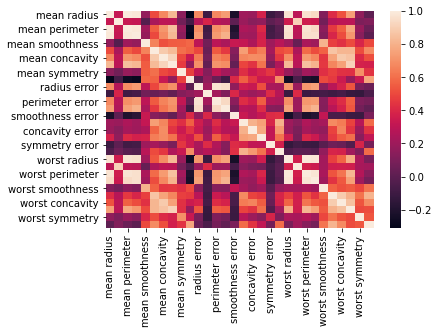

In [9]:
#2 step
#covariance
c=Z.cov()
#plot covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

In [13]:
#3 step
eigenvalues,eigenvectors=np.linalg.eig(c)
print('Eigen values:\n',eigenvalues)
print('Eigen values shape:',eigenvalues.shape)
print('Eigen vector shape:',eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values shape: (30,)
Eigen vector shape: (30, 30)


In [15]:
#sort eigenvalues&eigenvectors in descending order
#index eigenvalues in descending
idx=eigenvalues.argsort()[::-1]
#sort eigenvalues in desce
eigenvalues=eigenvalues[idx]
#sort correspondng eigenvectors accordingly
eigenvectors=eigenvectors[:,idx]

In [18]:
#Explained variance is the term that gives us an idea of the amount of the total variance
#which has been retained by selecting the principal components instead of the original feature space.

explained_var=np.cumsum(eigenvalues)/np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [20]:
#determine number of principal components
n_components=np.argmax(explained_var>=0.50)+1
n_components

2

In [23]:
#pca component or unit matrix
u=eigenvectors[:,:n_components]
pca_component=pd.DataFrame(u,index=cancer['feature_names'],columns=['PC1','PC2'])

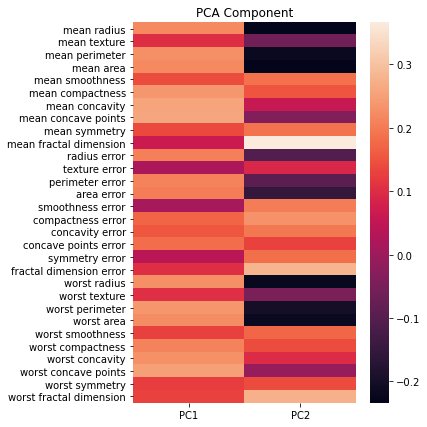

In [24]:
#plotting heatmap
plt.figure(figsize=(5,7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [26]:
#matrix multiplication or dot product
Z_pca=Z@pca_component
#Rename the columns
Z_pca.rename({'PC1':'PCA1','PC2':'PCA2'},axis=1,inplace=True)
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


pca using sklearn

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca=PCA(n_components=2)
pca.fit(Z)
x_pca=pca.transform(Z)

df_pca1=pd.DataFrame(x_pca,columns=['PC{}'.format(i+1) for i in range(n_components)])

In [29]:
print(df_pca1)

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


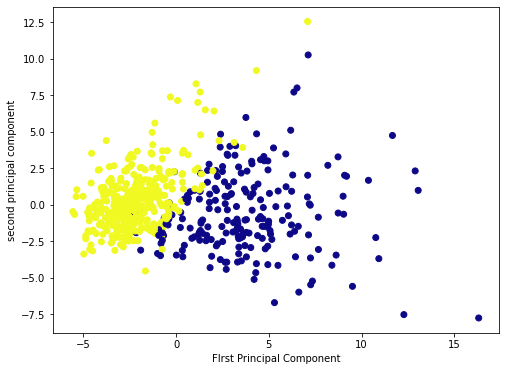

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')

plt.xlabel('FIrst Principal Component')
plt.ylabel('second principal component')
plt.show()

In [32]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])